In [64]:
#basic
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

#cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder # one hot coding
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Standarization
# Import module for k-protoype cluster
from kmodes.kmodes import KModes
from collections import Counter, defaultdict # coun the number of samples in each cluster
import pickle


#plot
import matplotlib.pyplot as plt
# Import module for data visualization
from plotnine import *
import plotnine
# Use the theme of ggplot
plt.style.use('ggplot')

# warnings
import warnings
warnings.filterwarnings('ignore')


# Churn
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from matplotlib import pyplot as plt
import numpy as np
import copy
import math
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import scikitplot as skplt

pd.options.display.max_columns = 1000


In [65]:
subscribers = pd.read_csv("subscribers.csv").drop(columns = "Unnamed: 0",axis = 1)
dic = pd.read_excel("data dictionary merged.xlsx")
engagement = pd.read_pickle("engagement")
channel = pd.read_excel("advertising_spend_data.xlsx")
reps = pd.read_pickle("customer_service_reps")

In [66]:
# preprocess for "subscribers"

# 1. Split month and year for "last_payment"
subscribers['last_payment'] = pd.to_datetime(subscribers['last_payment']) 
subscribers['last_payment_month']=subscribers['last_payment'].dt.month
subscribers['last_payment_year']=subscribers['last_payment'].dt.year


# 2. Split month and year for "create_date"
subscribers['account_creation_date'] = pd.to_datetime(subscribers['account_creation_date']) 
subscribers['account_creation_month']=subscribers['account_creation_date'].dt.month
subscribers['account_creation_year']=subscribers['account_creation_date'].dt.year
subscribers


#pd.DataFrame(subscribers.groupby("last_payment_month")['subid'].value_counts())

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,last_payment_month,last_payment_year,account_creation_month,account_creation_year
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,2020-02-07 21:44:16,False,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True,2.0,2020.0,1,2020
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,2020-03-15 15:44:35,False,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True,3.0,2020.0,3,2020
2,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,2019-12-21 16:37:06,False,0.1101,ar,NaN,14,False,0,NaT,NaN,NaN,True,NaN,NaN,12,2019
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,2020-02-10 16:09:32,False,0.0367,ar,NaN,14,False,0,NaT,NaN,NaN,True,NaN,NaN,1,2020
4,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,2019-10-19 12:57:07,False,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True,2.0,2020.0,10,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,UAE,facebook,facebook_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-17 14:12:33,2019-12-01 14:12:33,False,0.3303,ar,NaN,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,NaN,True,12.0,2019.0,11,2019
227624,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,UAE,google_organic,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-06 18:02:13,2019-12-20 18:02:13,False,0.3303,ar,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,NaN,True,12.0,2019.0,12,2019
227625,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-21 19:40:44,2020-01-04 19:40:44,True,0.0367,ar,NaN,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,NaN,True,1.0,2020.0,12,2019
227626,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-17 23:58:51,2020-01-31 23:58:51,False,NaN,ar,Paypal,14,True,1,2020-01-31 23:58:51,2020-05-31 23:58:51,NaN,True,1.0,2020.0,1,2020


In [67]:
# preprocess for "engagement"

# 1. group the by the subid and calculate the mean of each feature (date is dropped)
# This set will be used to merge with subscribers to do clustering
engagement_grp = engagement.drop(columns = "date",axis = 1).groupby("subid").agg("mean").reset_index()
eng_sub = engagement_grp.merge(subscribers, how = "inner", on = "subid")
eng_sub

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period_x,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period_y,last_payment,next_payment,cancel_date,trial_completed,last_payment_month,last_payment_year,account_creation_month,account_creation_year
0,20000062,1.000000,0.750000,1.500000,5.750000,0.000000,0.250000,0.000000,NaN,4.0,NaN,expand regional access,27.301448,2.0,59.0,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2019-06-30 22:44:55,2019-07-14 22:44:55,False,0.0367,ar,NaN,14,True,3,2020-03-14 22:44:55,2020-07-14 22:44:55,NaN,True,3.0,2020.0,6,2019
1,20000405,1.250000,1.000000,3.250000,4.250000,0.000000,0.250000,0.000000,enhanced,4.0,comedy,access to exclusive content,33.101274,2.0,48.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-08 11:25:48,2020-03-22 11:25:48,False,0.6606,ar,NaN,14,True,1,2020-03-22 11:25:48,2020-07-22 11:25:48,NaN,True,3.0,2020.0,3,2020
2,20000604,0.933333,0.333333,0.533333,4.533333,0.000000,0.066667,0.133333,economy,NaN,comedy,replace OTT,NaN,NaN,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-09 13:26:49,2020-02-23 13:26:49,False,NaN,ar,Paypal,14,False,0,NaT,NaN,2020-02-12 00:00:00,False,NaN,NaN,2,2020
3,20000685,1.210526,0.263158,0.368421,4.342105,0.000000,0.210526,0.657895,base,3.0,comedy,other,25.851492,2.0,67.0,False,UAE,referral,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-03 05:55:37,2020-03-17 05:55:37,False,0.3303,ar,Standard Charter,14,True,1,2020-03-17 05:55:37,2020-07-17 05:55:37,NaN,True,3.0,2020.0,3,2020
4,20000741,0.500000,0.500000,1.000000,3.500000,0.000000,0.000000,0.000000,base,NaN,comedy,access to exclusive content,25.851492,NaN,75.0,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2019-08-25 20:12:32,2019-09-08 20:12:32,False,0.0367,ar,NaN,14,False,1,2019-09-08 20:12:32,NaN,2019-09-27 00:00:00,True,9.0,2019.0,8,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135014,29999740,1.071429,0.214286,0.785714,2.214286,0.000000,0.000000,0.000000,NaN,NaN,NaN,expand regional access,21.501623,NaN,37.0,False,UAE,brand sem intent google,pinterest,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-07-11 20:31:47,2019-07-25 20:31:47,False,0.0367,ar,NaN,14,False,1,2019-07-25 20:31:47,NaN,2019-08-17 00:00:00,True,7.0,2019.0,7,2019
135015,29999820,1.200000,0.600000,2.200000,5.000000,0.000000,0.700000,0.000000,base,2.0,comedy,replace OTT,21.501623,2.0,66.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-09-22 15:03:46,2019-10-06 15:03:46,False,0.0367,ar,NaN,14,False,0,NaT,NaN,2019-10-01 00:00:00,False,NaN,NaN,9,2019
135016,29999822,1.000000,0.800000,0.400000,5.000000,0.000000,0.200000,0.000000,base,4.0,drama,access to exclusive content,30.201361,3.0,40.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-22 03:11:30,2019-12-06 03:11:30,False,0.1101,ar,NaN,14,True,1,2019-12-06 03:11:30,2020-04-06 03:11:30,NaN,True,12.0,2019.0,11,2019
135017,29999889,3.223684,0.592105,4.289474,4.289474,0.526316,0.894737,1.197368,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,brand sem intent google,tv,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-08-23 16:10:06,2019-09-06 16:10:06,False,NaN,ar,Standard Charter,14,True,2,2020-01-06 16:10:06,2020-05-06 16:10:06,NaN,True,1.0,2020.0,8,2019


## Allocation & Attribution

In [68]:
# 1. Group the subscribers data and count the number of new customers at each month
create_month_temp = subscribers.groupby("account_creation_month")["subid"].agg("count")
create_month_temp1 = create_month_temp.reset_index()
create_month_temp2 = create_month_temp1.rename(columns={'subid': 'count'})
# At this point, each column shows the counts of customers in each month

# 2. Group the subscribers data and count the number of new customers at each month by different channel
create_temp = subscribers.groupby(["account_creation_month","attribution_technical"]).size()
create_temp1 = create_temp.reset_index()
create_temp2 = create_temp1.rename(columns={0: 'count'})
# convert create_temp2 to excel and work in excel
#create_temp2.to_excel("create_temp2.xlsx")


# 3. Split month and year for "create_date"
channel['date'] = pd.to_datetime(channel['date']) 
channel['channel_month']=channel['date'].dt.month
channel['channel_year']=channel['date'].dt.year
# convert create_temp2 to excel and work in excel
#channel.to_excel("channel.xlsx")

In [69]:
create_temp2

,account_creation_month,attribution_technical,count
0,1,affiliate,1074
1,1,appstore,13
2,1,bing,172
3,1,bing_organic,37
4,1,brand sem intent bing,360
...,...,...,...
248,12,podcast,94
249,12,referral,666
250,12,search,3770
251,12,vod,37


In [70]:
# Find the best bundle
temp = pd.read_excel("Temp.xlsx")
l1 = temp["facebook"].to_list()
l2 = temp["email"].to_list()
l3 = temp["search"].to_list()
l4 = temp["brand sem intent google"].to_list()
l5 = temp["affiliate"].to_list()
l6 = temp["pinterest"].to_list()
l7 = temp["referral"].to_list()
ttl_ls = [l1,l2,l3,l4,l5,l6,l7]
print(l1)

count = 0
order_ls = []
while count < 15: #threshould
    check_ls = []
    for ls in ttl_ls:
        # add the first number in each list to the check list
        check_ls.append(ls[0]) 
    
    # Find the minimun number in this list
    check_min = min(check_ls)
    min_ind = check_ls.index(check_min)
    
    # Add the minimun number to the order_list
    order_ls.append(check_min)
    
    # Remove that number by locating the index of list in the ttl_ls
    ttl_ls[min_ind].pop(0)
    # Add back a placeholder "10000" at the end of list so that the list will not go empty
    ttl_ls[min_ind].append(10000)
    
    
    count += 1
    
order_ls

[8.470682249525522, 6.0882800608828, 8.533202806330559, 5.163873959321319, 3.947672181608311, 6.040051679586563, 8.173000477023374, 6.134201301952929, 7.2143997677456815]


[7.440100882723834,
 8.470682249525522,
 6.0882800608828,
 8.533202806330559,
 5.163873959321319,
 3.947672181608311,
 6.040051679586563,
 8.173000477023374,
 6.134201301952929,
 7.2143997677456815,
 9.419152276295133,
 10.239234449760765,
 11.240105540897098,
 11.553030303030303,
 11.992263056092844]

In [71]:
temp

,Mar CAC,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,7,8.470682,23.006135,13.027108,10.239234,14.183552,6.953642,7.440101,11.553030
1,8,6.088280,24.450194,8.922125,11.240106,6.305833,15.667718,9.419152,12.667946
2,9,8.533203,31.446281,9.773218,13.921569,15.305164,41.656131,11.992263,11.683849
3,10,5.163874,32.885033,8.101157,13.295880,21.578947,75.435005,8.797654,13.988658
4,11,3.947672,29.411765,8.366534,10.541872,23.968566,51.351351,11.279461,12.436116
5,12,6.040052,28.352634,5.676393,8.841588,20.707965,23.844282,7.403055,10.960961
6,1,8.173000,32.136824,7.881169,8.453922,11.266294,100.000000,8.791209,13.698630
7,2,6.134201,23.832071,7.813953,9.676044,9.662162,4.545455,9.852941,12.692967
8,3,7.214400,21.842030,9.731652,12.294618,9.253547,5.357143,14.065934,11.443662


## Customer Seg

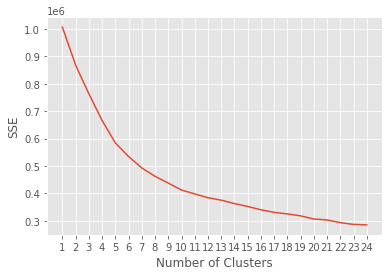

kmeans_labels
0     8201
1    43119
2    11491
3     5151
4    21213
5    11746
6    10916
Name: subid, dtype: int64

In [72]:
eng_sub_dummy_temp = pd.get_dummies(eng_sub,columns = ["package_type","preferred_genre","intended_use",\
                       "country","male_TF","attribution_technical","attribution_survey",\
                            "op_sys","plan_type","initial_credit_card_declined","language",\
                            "payment_type","trial_completed"],drop_first = True).fillna(0)

eng_sub_dummy_2 = eng_sub_dummy_temp[(eng_sub_dummy_temp["age"]<100) & (eng_sub_dummy_temp["age"]>0)]


eng_sub_feature = eng_sub_dummy_2[["app_opens","num_videos_more_than_30_seconds","weekly_consumption_hour","age",\
                                 "package_type_economy","package_type_enhanced",\
                                "male_TF_True","trial_completed_True","join_fee"]]

# Scale Data
feature_scaled = preprocessing.StandardScaler().fit(eng_sub_feature).transform(eng_sub_feature)

# Fill na


sse_ls = []
for i in range(1,25):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(feature_scaled)
    # Drop "trial_completed_True" (label) and "subid" in the model
    # Drop date variables
    # Fill nas with 0
    sse_ls.append(kmeans.inertia_)

plt.plot(range(1, 25), sse_ls)
plt.xticks(range(1, 25))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# cluster of 7
kmeans = KMeans(n_clusters=7,random_state=42)
kmeans.fit(feature_scaled)

# Label the original data
eng_sub_dummy_2["kmeans_labels"] = kmeans.labels_
# Count the number of each cluster
eng_sub_dummy_2.groupby("kmeans_labels")["subid"].count()

# To excel
#sse_ls
#df_sse = pd.DataFrame({"SSE":sse_ls})
#df_sse.to_excel("df_sse.xlsx")

0


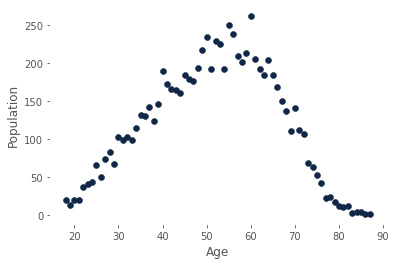

1


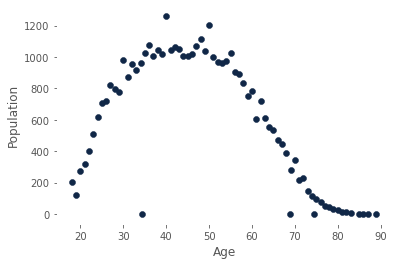

2


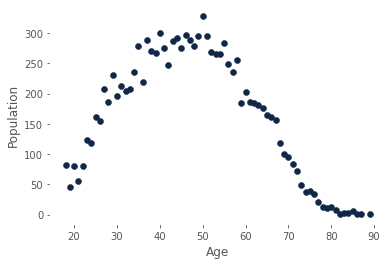

3


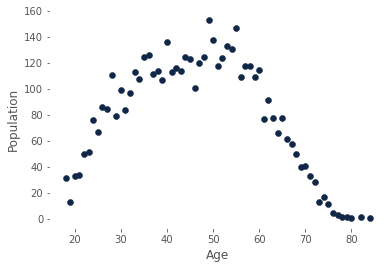

4


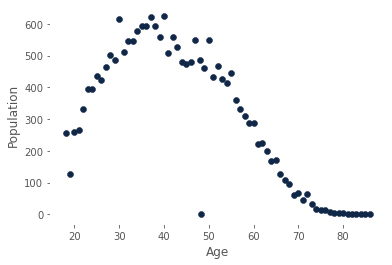

5


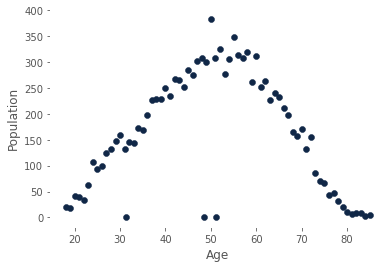

6


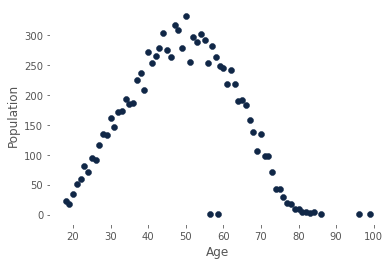

,app_opens,num_videos_more_than_30_seconds,weekly_consumption_hour,age,package_type_economy,package_type_enhanced,male_TF_True,trial_completed_True,join_fee
0,0.017439,0.018299,0.064461,0.401962,3.529377,-0.603930,0.121896,-0.149945,0.275536
1,-0.236214,-0.032651,-0.168816,-0.063723,-0.283336,-0.603930,-0.361290,0.385718,-0.463971
2,-0.100313,-0.109832,1.382830,0.026659,-0.281345,0.212578,2.725815,0.036596,0.168136
3,3.121815,0.251226,-0.115379,-0.008280,-0.206267,-0.081266,-0.242079,0.236369,-0.147358
4,-0.097311,0.052970,-0.090174,-0.326123,-0.283336,1.655821,-0.364204,0.385718,-0.176556
5,-0.099230,0.043057,-0.258704,0.318960,-0.283336,-0.298912,-0.341849,0.262024,1.988841
6,-0.149865,-0.036835,-0.329139,0.215975,-0.283336,-0.241865,-0.343969,-2.592570,-0.279406


In [73]:
# Business Insights

# 1. Male vs. Female
eng_sub_dummy_2["male_TF_True"].value_counts()
eng_sub_dummy_2.groupby("kmeans_labels").agg("mean")["male_TF_True"]
# The number of male and female has a huge difference in the original data

# 2. Age
for i in range(0,7):
    age_cluster = pd.DataFrame(eng_sub_dummy_2[(eng_sub_dummy_2["kmeans_labels"]==i) & (eng_sub_dummy_2["age"] < 100) & (eng_sub_dummy_2["age"] > 0)]["age"].value_counts()).reset_index()
    print(i)

    plt.scatter(age_cluster["index"], age_cluster["age"],color = "#102747")
    plt.xlabel("Age")
    ax = plt.axes()
    ax.set_facecolor("white")
    plt.ylabel("Population")
    plt.show()
# Grp 0,1,2,3 have age around 40 and grp 6 has age around 60
    
# 3. Centers

# Columns for centroids
list_col = eng_sub_feature.columns
# Create an index for cluster interpretation
index = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7','Cluster 8']
 # Create the data frame
df_centers_eng_sub = pd.DataFrame(kmeans.cluster_centers_, columns = list_col)
df_centers_eng_sub   
#feature_scaled.inverse_transform(kmeans.cluster_centers_)
    

In [74]:
eng_sub_dummy_2.groupby("kmeans_labels").agg("mean")
#eng_sub_dummy_2.groupby("kmeans_labels").agg("mean").to_excel("cluster_centers.xlsx")

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period_x,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,months_per_bill_period,monthly_price,discount_price,join_fee,num_trial_days,current_sub_TF,payment_period_y,last_payment_month,last_payment_year,account_creation_month,account_creation_year,package_type_economy,package_type_enhanced,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_True,attribution_technical_appstore,attribution_technical_bing,attribution_technical_bing_organic,attribution_technical_brand sem intent bing,attribution_technical_brand sem intent google,attribution_technical_content_greatist,attribution_technical_criteo,attribution_technical_direct_mail,attribution_technical_discovery,attribution_technical_display,attribution_technical_email,attribution_technical_email_blast,attribution_technical_facebook,attribution_technical_facebook_organic,attribution_technical_google_organic,attribution_technical_influencer,attribution_technical_internal,attribution_technical_organic,attribution_technical_other,attribution_technical_ott,attribution_technical_pinterest,attribution_technical_pinterest_organic,attribution_technical_playstore,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_twitter,attribution_technical_vod,attribution_technical_youtube,attribution_survey_amfm_radio,attribution_survey_direct_mail,attribution_survey_facebook,attribution_survey_facebook_organic,attribution_survey_other,attribution_survey_ott,attribution_survey_pinterest,attribution_survey_podcast,attribution_survey_public_radio,attribution_survey_referral,attribution_survey_search,attribution_survey_sirius xm,attribution_survey_social_organic,attribution_survey_tv,attribution_survey_youtube,op_sys_iOS,plan_type_base_uae_14_day_trial,plan_type_base_uae_no_trial_7_day_guarantee,plan_type_high_aud_14_day_trial,plan_type_high_jpy_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,plan_type_low_uae_no_trial,initial_credit_card_declined_True,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,trial_completed_True
kmeans_labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.495724e+07,1.743553,0.691798,2.485365,4.785581,0.025084,0.460936,0.257362,2.246433,27.983190,1.487258,51.235337,4.0,4.735240,4.515416,0.162172,14.000000,0.416169,0.515303,1.918912,813.450921,6.620656,2019.443483,1.000000,0.000000,0.352274,0.048775,0.030484,0.035605,0.000366,0.000854,0.001097,0.032191,0.303378,0.139739,0.157542,0.000244,0.006463,0.001829,0.015974,0.098890,0.000122,0.000000,0.001097,0.018290,0.006219,0.122668,0.024509,0.301061,0.013535,0.060237,0.000244,0.004756,0.109377,0.007926,0.000366,0.024631,0.000000,0.000000,0.004512,0.000488,0.028289,0.000000,0.109621,0.000000,0.000000,0.001585,0.003780,0.003048,0.001829,0.435922,0.004999,0.030118,0.006219,0.031703,0.016583,0.054871,0.121936,0.033411,0.006585,0.017681,0.210584,0.010365,0.615657,0.997439,0.000000,0.000000,0.000000,0.000000,0.002561,0.000000,0.000000,0.036947,0.029996,0.015730,0.123643,0.079015,0.163517,0.820144
1,2.499060e+07,1.368810,0.671147,2.493939,4.722324,0.016809,0.429272,0.205335,2.160950,26.651521,1.458591,44.890828,4.0,4.733325,4.513594,0.033370,13.992857,0.496602,0.867297,3.102159,1148.373293,7.439945,2019.177114,0.000000,0.000000,0.142768,0.022403,0.014309,0.028642,0.058234,0.146548,0.164730,0.033883,0.189568,0.093370,0.001554,0.000209,0.004151,0

In [75]:
eng_sub_dummy_2["male_TF_True"]

0         0
1         0
3         0
4         0
5         0
         ..
135013    0
135014    0
135015    0
135016    0
135018    0
Name: male_TF_True, Length: 111837, dtype: uint8

## Churn

In [76]:
# 1. Create a new dummy variable dataset
eng_sub_dummy_temp = pd.get_dummies(eng_sub,columns = ["package_type","preferred_genre",\
                       "country","male_TF",\
                            "op_sys","plan_type","initial_credit_card_declined","language",\
                            "trial_completed"],drop_first = True).fillna(0)
# 2. select age
eng_sub_dummy_2 = eng_sub_dummy_temp[(eng_sub_dummy_temp["age"]<100) & (eng_sub_dummy_temp["age"]>0)]

# 3. Define a churn variable
eng_sub_dummy_2["churn"] = ((eng_sub_dummy_2["trial_completed_True"] == 0) | (eng_sub_dummy_2["current_sub_TF"] == False))*1
eng_sub_dummy_2["churn"]

# 4. Split train and test set
df_train, df_test = model_selection.train_test_split(eng_sub_dummy_2, test_size=0.3,random_state = 42)


# 5. Select X variables and Y varaible
# ----- FIT CHURN MODEL ------
y_col_name = 'churn' # specify which column contains outcome variable y. Needs to be coded as binary True/False or 0/1
x_col_name = list(eng_sub_dummy_2.drop(columns = ["subid","account_creation_date","trial_end_date","current_sub_TF","last_payment",\
                             "next_payment","cancel_date","last_payment_month","last_payment_year","account_creation_month",\
                             "trial_completed_True","attribution_technical","attribution_survey",\
                              "payment_type","intended_use","churn","plan_type_high_jpy_14_day_trial",\
                            "plan_type_low_gbp_14_day_trial",\
                            "plan_type_base_uae_no_trial_7_day_guarantee","plan_type_high_aud_14_day_trial",\
                            "plan_type_high_sar_14_day_trial","plan_type_high_uae_14_day_trial","plan_type_low_uae_no_trial",
                            "account_creation_year","payment_period_x"]).columns)

# 6. Fit models
# --- fit linear probability model
lpm_model = sm.OLS(endog=df_train[y_col_name], exog=df_train[x_col_name])
lpm_results = lpm_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())

# --- fit logistic regression
#logit_model = LogisticRegression()
#logit_results = logit_model.fit(eng_sub_dummy[x_col_name],eng_sub_dummy[y_col_name])
logit_model = sm.Logit(endog=df_train[y_col_name].astype(int), exog=df_train[x_col_name].astype(float))
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())


print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary2())




RESULTS OF LOGIT MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     5123.
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        20:06:18   Log-Likelihood:                -18690.
No. Observations:               78285   AIC:                         3.743e+04
Df Residuals:                   78259   BIC:                         3.767e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

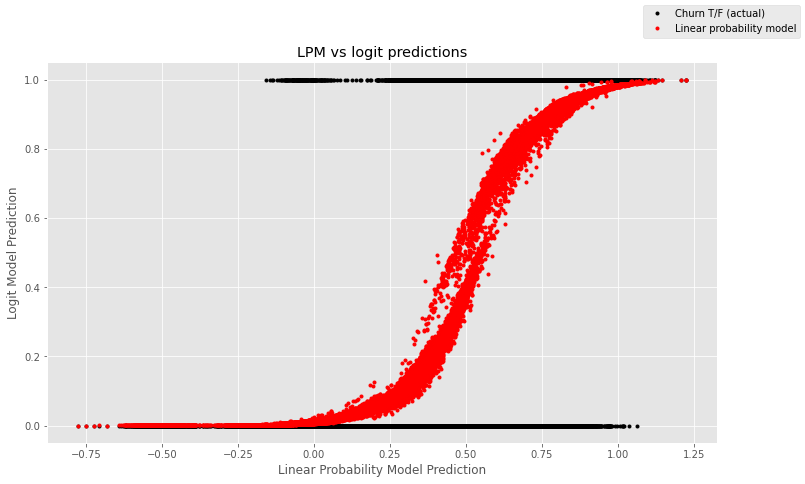

In [77]:
# ----- EVALUATE MODEL PERFORMANCE -----
# --- evaluate model predictions on test set graphically
df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name])
df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name])

# compare lpm and logit predictions
fig = plt.figure(figsize=(12,7))
ax = plt.gca()
ax.plot(df_test[['prob_churn_lpm']], df_test[['churn']], 'k.')
ax.plot(df_test[['prob_churn_lpm']], df_test[['prob_churn_logit']], 'r.')
#plt.ylim(df_test[['prob_churn_lpm', 'prob_churn_logit']].min().min()-.05, df_test[['prob_churn_lpm', 'prob_churn_logit']].max().max()+.05)
#plt.xlim(ax.get_ylim())
plt.title('LPM vs logit predictions')
plt.xlabel('Linear Probability Model Prediction')
plt.ylabel('Logit Model Prediction')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])





In [85]:
#df_test['churn']
#df_test['prob_churn_lpm']
#df_test['prob_churn_logit']

#churn_df = pd.DataFrame({"Churn":df_test['churn'],"LPM":df_test['prob_churn_lpm'],"Logit":df_test['prob_churn_logit']})
#churn_df.to_excel("churn_df.xlsx")


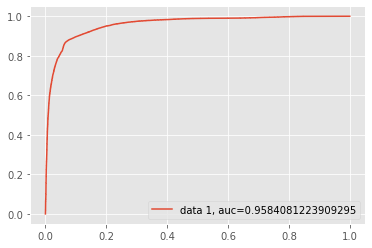

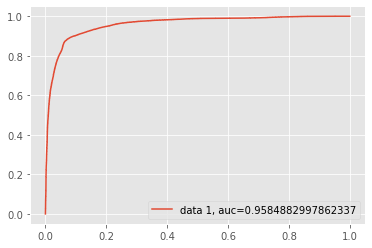

In [79]:
# --- evaluate model predictions using numerical quantification (ROC curves)
# make confusion matrices
# calculate the fpr and tpr for all thresholds of the classification

#probs = lpm_model.predict_proba(df_test[x_col_name])
#preds = probs[:,1]
#fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
#roc_auc = metrics.auc(fpr, tpr)

# Linear roc
y_pred_proba_linear = lpm_results.predict(df_test[x_col_name])
y_test = df_test['churn']
fpr_linear, tpr_linear, _linear = metrics.roc_curve(y_test,  y_pred_proba_linear)
auc_linear = metrics.roc_auc_score(y_test, y_pred_proba_linear)
plt.plot(fpr_linear,tpr_linear,label="data 1, auc="+str(auc_linear))
plt.legend(loc=4)
plt.show()

# Logit roc
y_pred_proba = logit_results.predict(df_test[x_col_name])
y_test = df_test['churn']
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [90]:
AUC_linear_df = pd.DataFrame({"Linear fpr":tpr_linear,"Linear tpr":fpr_linear})
AUC_logit_df = pd.DataFrame({"Logit fpr":fpr,"Logit tpr":tpr})
AUC_linear_df.to_excel("AUC_linear_df.xlsx")
AUC_logit_df.to_excel("AUC_logit_df.xlsx")






In [80]:
# Threshold Test

# For Logistic
Y_test = df_test['churn']
pred_proba_df = pd.DataFrame(df_test['prob_churn_logit'])
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95]

test_accuracy_logit_ls = []


for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(Y_test.to_numpy().reshape(Y_test.to_numpy().size,1),
                                           Y_test_pred.to_numpy().reshape(Y_test_pred.to_numpy().size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))
    test_accuracy_logit_ls.append(test_accuracy)

    print(confusion_matrix(Y_test.to_numpy().reshape(Y_test.to_numpy().size,1),
                           Y_test_pred.to_numpy().reshape(Y_test_pred.to_numpy().size,1)))
    
# For Liear
Y_test = df_test['churn']
pred_proba_df = pd.DataFrame(df_test['prob_churn_lpm'])
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95]
test_accuracy_linear_ls = []

for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(Y_test.to_numpy().reshape(Y_test.to_numpy().size,1),
                                           Y_test_pred.to_numpy().reshape(Y_test_pred.to_numpy().size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))
    test_accuracy_linear_ls.append(test_accuracy)

    print(confusion_matrix(Y_test.to_numpy().reshape(Y_test.to_numpy().size,1),
                           Y_test_pred.to_numpy().reshape(Y_test_pred.to_numpy().size,1)))
    

# Convert results to excel
#df_accuracy = pd.DataFrame({"threshold":threshold_list, "Linear Accuracy":test_accuracy_linear_ls,\"Logit Accuracy":test_accuracy_logit_ls})
#df_accuracy.to_excel("df_accuracy.xlsx")


******** For i = 0.05 ******
Our testing accuracy is 0.7106580829756796
[[ 8239  9540]
 [  168 15605]]

******** For i = 0.1 ******
Our testing accuracy is 0.7834108249880782
[[10800  6979]
 [  288 15485]]

******** For i = 0.15 ******
Our testing accuracy is 0.8344957081545065
[[12680  5099]
 [  454 15319]]

******** For i = 0.2 ******
Our testing accuracy is 0.8644492131616596
[[13967  3812]
 [  736 15037]]

******** For i = 0.25 ******
Our testing accuracy is 0.8843884120171673
[[14958  2821]
 [ 1058 14715]]

******** For i = 0.3 ******
Our testing accuracy is 0.8954756795422032
[[15632  2147]
 [ 1360 14413]]

******** For i = 0.35 ******
Our testing accuracy is 0.9030162136385312
[[16096  1683]
 [ 1571 14202]]

******** For i = 0.4 ******
Our testing accuracy is 0.906413924654268
[[16360  1419]
 [ 1721 14052]]

******** For i = 0.45 ******
Our testing accuracy is 0.9072484501669051
[[16504  1275]
 [ 1837 13936]]

******** For i = 0.5 ******
Our testing accuracy is 0.90668216499761

In [110]:
# Churn Assumption

acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.55
base_price = 10
discount_amount = 0.1

ttl_pop = 100000
lin_churn = int(math.ceil(  ( sum((df_test['prob_churn_lpm'] > threshold) *1) / df_test.shape[0] ) * ttl_pop )) # round up
log_churn = int(math.ceil(  ( sum((df_test['prob_churn_logit'] > threshold) *1) / df_test.shape[0] ) * ttl_pop )) # round up


# Linear Revenue Lift

# No offer
base_revenue_linear = (ttl_pop - lin_churn) * base_price
# With offer
non_chun_revenue_linear = (ttl_pop - lin_churn) * base_price * (1 - discount_amount)
churn_revenue_linear = lin_churn * acceptance_rate_churn * base_price * (1 - discount_amount)
offer_revenue_linear = non_chun_revenue_linear + churn_revenue_linear

offer_revenue_linear - base_revenue_linear




63144.09999999998

In [154]:
# Churn Assumption loop

acceptance_rate_nonchurn = 0.5
acceptance_rate_churn = 0.2
threshold = 0.5
base_price = 10
discount_amount = 0.1

ttl_pop = 100000
lin_churn = int(math.ceil(  ( sum((df_test['prob_churn_lpm'] > threshold) *1) / df_test.shape[0] ) * ttl_pop )) # round up
log_churn = int(math.ceil(  ( sum((df_test['prob_churn_logit'] > threshold) *1) / df_test.shape[0] ) * ttl_pop )) # round up


# Linear Revenue Lift
linear_revenue_lift = []
discount_amount_ls = discount_amount_ls = list(np.linspace(0,1,49))
#discount_amount_ls = list(np.linspace(0,0.2,19))

for i in discount_amount_ls:
    # No offer
    base_revenue_linear = (ttl_pop - lin_churn) * base_price
    # With offer
    non_chun_revenue_linear = (ttl_pop - lin_churn) * base_price * (1 - i) * acceptance_rate_nonchurn + (ttl_pop - lin_churn) * base_price * (1 - acceptance_rate_nonchurn)
    churn_revenue_linear = lin_churn * i * base_price * (1 - i)
    offer_revenue_linear = non_chun_revenue_linear + churn_revenue_linear
    
    # Revenue Lift
    lift = (offer_revenue_linear - base_revenue_linear) / base_revenue_linear
    linear_revenue_lift.append(lift)


linear_revenue_lift



[0.0,
 0.0068280682936579734,
 0.012922318078366385,
 0.018282749354124377,
 0.022909362120932378,
 0.02680215637879082,
 0.02996113212769884,
 0.032386289367657084,
 0.03407762809866533,
 0.03503514832072338,
 0.035258850033831654,
 0.03474873323798993,
 0.03350479793319801,
 0.0315270441194563,
 0.0288154717967644,
 0.025370080965122718,
 0.02119087162453104,
 0.016277843774989163,
 0.010630997416497508,
 0.004250332549055863,
 -0.0028641508273357734,
 -0.010712452712677616,
 -0.019294573106969234,
 -0.028610512010210844,
 -0.03866026942240266,
 -0.04944384534354425,
 -0.060961239773635933,
 -0.07321245271267762,
 -0.08619748416066918,
 -0.09991633411761083,
 -0.1143690025835025,
 -0.12955548955834403,
 -0.14547579504213565,
 -0.16212991903487728,
 -0.1795178615365688,
 -0.1976396225472104,
 -0.216495202066802,
 -0.23608460009534346,
 -0.2564078166328351,
 -0.2774648516792766,
 -0.29925570523466805,
 -0.3217803772990096,
 -0.34503886787230115,
 -0.3690311769545426,
 -0.39375730454573

In [157]:
# Churn Assumption loop

acceptance_rate_nonchurn = 0.5
acceptance_rate_churn = 0.2
threshold = 0.5
base_price = 10
discount_amount = 0.1

ttl_pop = 100000
lin_churn = int(math.ceil(  ( sum((df_test['prob_churn_lpm'] > threshold) *1) / df_test.shape[0] ) * ttl_pop )) # round up
log_churn = int(math.ceil(  ( sum((df_test['prob_churn_logit'] > threshold) *1) / df_test.shape[0] ) * ttl_pop )) # round up



# Logistic Revenue Lift
logistic_revenue_lift = []
discount_amount_ls = list(np.linspace(0,1,49))
#discount_amount_ls = list(np.linspace(0,0.2,19))

for i in discount_amount_ls:
    # No offer
    base_revenue_logit = (ttl_pop - log_churn) * base_price
    # With offer
    non_chun_revenue_logit = (ttl_pop - log_churn) * base_price * (1 - i) * acceptance_rate_nonchurn + (ttl_pop - log_churn) * base_price * (1 - acceptance_rate_nonchurn)
    churn_revenue_logit = log_churn * i * base_price * (1 - i)
    offer_revenue_logit = non_chun_revenue_logit + churn_revenue_logit
    
    # Revenue Lift
    lift = (offer_revenue_logit - base_revenue_logit) / base_revenue_logit
    logistic_revenue_lift.append(lift)


logistic_revenue_lift


[0.0,
 0.006180845862502499,
 0.011655414596104531,
 0.01642370620080525,
 0.020485720676605295,
 0.02384145802350466,
 0.02649091824150314,
 0.028434101330600935,
 0.029671007290797635,
 0.030201636122093655,
 0.030025987824489,
 0.029144062397983242,
 0.02755585984257681,
 0.025261380158269696,
 0.022260623345061483,
 0.01855358940295259,
 0.014140278331943023,
 0.009020690132032355,
 0.003194824803221009,
 -0.0033373176544910146,
 -0.010575737241104138,
 -0.01852043395661794,
 -0.02717140780103242,
 -0.036528658774348,
 -0.04659218687656426,
 -0.05736199210768119,
 -0.06883807446769923,
 -0.08102043395661794,
 -0.09390907057443733,
 -0.10750398432115782,
 -0.121805175196779,
 -0.13681264320130093,
 -0.1525263883347238,
 -0.1689464105970474,
 -0.18607270998827172,
 -0.20390528650839712,
 -0.2224441401574232,
 -0.24168927093534995,
 -0.2616406788421778,
 -0.28229836387790636,
 -0.30366232604253557,
 -0.32573256533606576,
 -0.3485090817584969,
 -0.3719918753098285,
 -0.3961809459900612

In [158]:
revenue_lift_df = pd.DataFrame({"Linear Lift":linear_revenue_lift, "Logistic Lift":logistic_revenue_lift,"Discount Rate":discount_amount_ls})
revenue_lift_df.to_excel("revenue_lift_df.xlsx")



